<a id="cont"></a>

## Table of Contents

<a href=#one1>1. Introduction</a>

<a href=#onei>2. Problem Statement</a>


<a href=#one>3. Importing Packages</a>

<a href=#two>4. Loading Data</a>

<a href=#three>5. Exploratory Data Analysis (EDA)</a>


<a href=#four>6. Data Engineering</a>

<a href=#five>7. Modeling</a>

<a href=#six>8. Model Performance</a>

<a href=#seven>9. Model Explanations</a>

<a href=#threefiv>10. Conclusion</a>



<a id="one1"></a>
## 1. Introduction

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="onei"></a>
## 2.  Problem Statement: Twitter Sentiment Classification

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

 <a id="one"></a>
## 3. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In [5]:
# utilities
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
# Libraries from Sklearn
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score

<a id="two"></a>
## 4. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [6]:
# Load the train and test data

df_train = pd.read_csv('train_set.csv')
df_test= pd.read_csv('test_set.csv')

In [7]:
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


<a id="three"></a>
## 5. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [8]:
# train Dataset
df_train.head(10)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


In [9]:
# Columns of the dataset
df_train.columns

Index(['lang_id', 'text'], dtype='object')

In [10]:
# Shape of data Set
df_train.shape


(33000, 2)

In [11]:
# total number of entries in dataset
df_train.size

66000

In [12]:
#unique values in columns
df_train.nunique()

lang_id       11
text       29948
dtype: int64

In [13]:
#Data information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [14]:
# Nullvalues present in each column
df_train.isnull().sum()

lang_id    0
text       0
dtype: int64

In [15]:
# Describin dataframe
df_train.describe(include='object')

,lang_id,text
count,33000,33000
unique,11,29948
top,xho,ngokwesekhtjheni yomthetho ophathelene nalokhu...
freq,3000,17


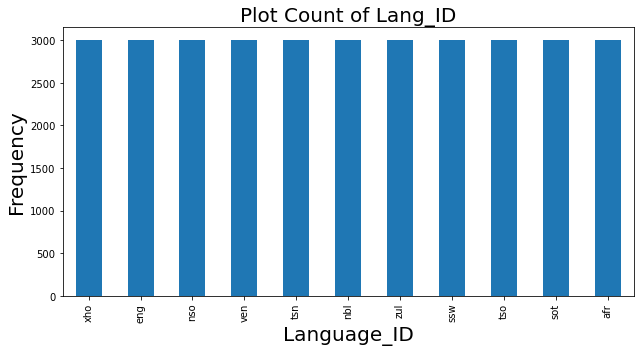

In [16]:
# Plotting count of the different lang_id

plt.figure(figsize=(9,5))
plt.xlabel('Language_ID', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
df_train["lang_id"].value_counts().plot(kind="bar")
plt.title('Plot Count of Lang_ID', fontsize=20)
plt.tight_layout()
plt.show()

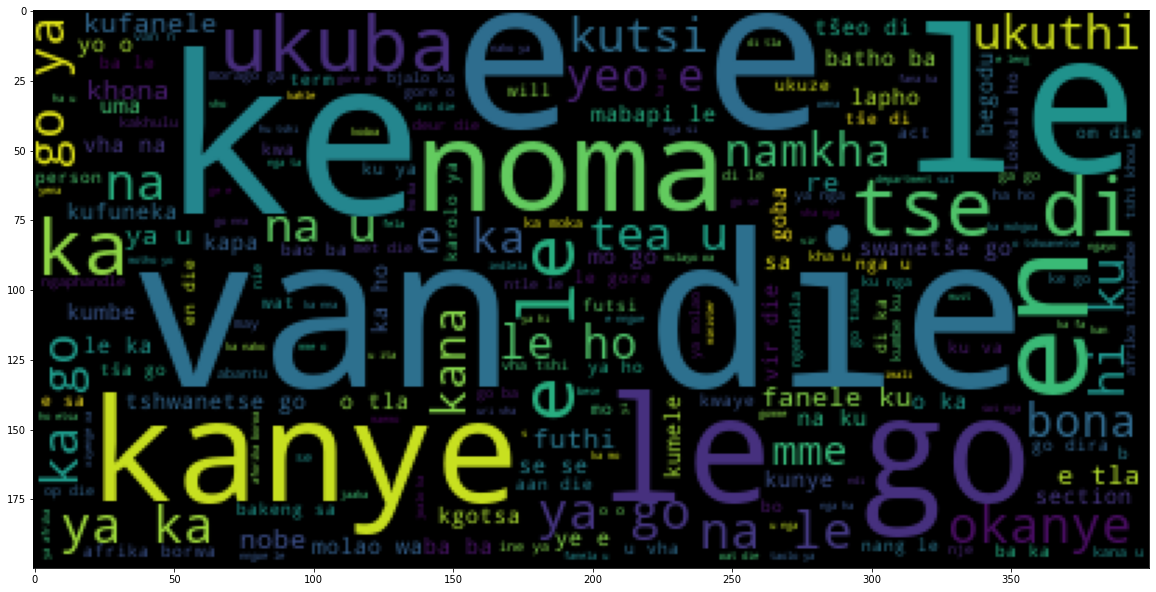

In [17]:
# Wordcloud for text
sentences = df_train['text'].tolist()
len(sentences)
sentences_as_one_string = ''.join(sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string));

<a id="four"></a>
## 6. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


**Vectorizing train data**

In [18]:
# Vectorising text in the data
vectoriser = CountVectorizer()
X_vect = vectoriser.fit_transform(df_train['text'].values.astype(str))

In [19]:
# Checking shape of vectorised form
X_vect.shape

(33000, 141958)

Varince in shape, vectorizing with selected features

In [20]:
# Initializing vectorization
vectoriser_2 = CountVectorizer(lowercase=True, stop_words='english', max_features=100000,analyzer='word', ngram_range=(1, 3))
X_vect = vectoriser_2.fit_transform(df_train['text'].values.astype(str))

In [21]:
# Checking shape again
X_vect.shape

(33000, 10000)

<a id="five"></a>
## 7. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

#### Splitting X and y values

In [22]:
X=X_vect.toarray()
y=df_train["lang_id"]

#### Creating train and validation data set

In [23]:
# Separating the 80% data for training data and 20% for validation data
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 20, random_state =42)

Having splited our data into training and val sets, we can go ahead to build a machine learning model.

The model will trained(find the patterns) on the training set.

And evaluate it(use the patterns) first on the val set as created initially

This will be done using Naive-Bayes MultiNomial NB machine learning model


In [24]:
# Creating a dictionary for the models starting with Linear Regression
model ={"Naive_Bayes_1": MultinomialNB()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_val, y_train, y_val):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data 
    X_val: val data 
    y_tain: training labels
    y_test val labels
    """
    # Set random seed
    np.random.seed(42)
    
    # Make a dictionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        y_pred = model.predict(X_val)
        model_scores[name] = f1_score(y_val, y_pred, pos_label='positive',
                                           average='micro')
    return model_scores

In [26]:
#### Checking model scores
model_scores = fit_and_score(models=model,
                             X_train=X_train,
                             X_val=X_val,
                             y_train=y_train,
                             y_val=y_val)

model_scores

C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


{'Naive_Bayes_1': 1.0}

<a id="six"></a>
## 8. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

#### Plotting base models performance

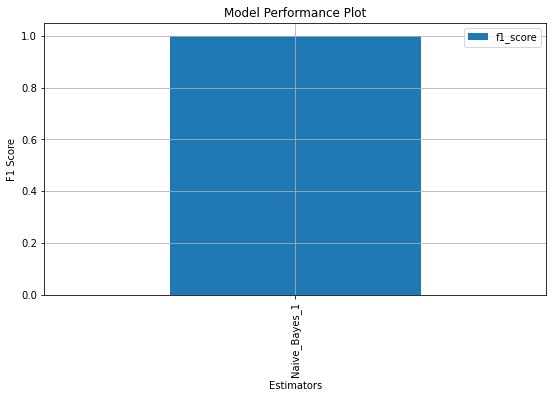

In [27]:
# Compare model performance
model_pic = pd.DataFrame(model_scores, index=["f1_score"])
model_pic.T.plot.bar(figsize=(9,5), title="Model Performance Plot")
plt.xlabel("Estimators")
plt.ylabel("F1 Score")
plt.grid()

#### Make predictions on test dataset

We will use the Logistic Regression model which is one of the  four best performing model according the `f1_score` report to predict the `sentiment` for the test dataset `df_test` provided. The predictions made with the model will be submitted as the **submission_file** on Kaggle competition website

In [28]:
# Checking test data set
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


### Preprocessing test data set

In this section, we going to create a function to get the test datset in same format as our training dataset. A function is appllied so it can be repeated across any dataset provided. The function will take the dataset and process it to return in the same fortmat as training set

In [29]:
# Applying the vectorizer on test data
x_test = df_test["text"]
vect_text = vectoriser_2.transform(x_test)

vect_text   

<5682x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 91075 stored elements in Compressed Sparse Row format>

#### Predicting preprocessed test data

In [32]:
# Making predictions on df_test using Logistic Regression
model_list = list(model.values())
model_list

[MultinomialNB()]

In [33]:
preds = model_list[0].predict(vect_text)
preds

array(['tsn', 'nbl', 'ven', ..., 'sot', 'sot', 'nbl'], dtype='<U3')

#### Creating submission file for Kaggle using base model

In [34]:
# Converting the prediction to DataFrame
d1=pd.DataFrame(preds, columns=["lang_id"])
d1.head()

,lang_id
0,tsn
1,nbl
2,ven
3,ssw
4,afr


In [35]:
d_2 = pd.DataFrame({"index": df_test["index"]})
d1_hack = d_2.join(d1)
d1_hack.head()

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr


In [36]:
d1_hack.to_csv("d1_hack.csv", index=False)

<a id="seven"></a>
## 9. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

**Naive-Bayes MultiNominal NB:** Naïve Bayes — a probabilistic approach for constructing the data classification models. It’s formulated as several methods, widely used as an alternative to the distance-based K-Means clustering and decision tree forests, and deals with probability as the “likelihood” that data belongs to a specific class. The Gaussian and Multinomial models of the naïve Bayes exist.
The multinomial model provides an ability to classify data, that cannot be represented numerically. Its main advantage is the significantly reduced complexity. It provides an ability to perform the classification, using small training sets, not requiring to be continuously re-trained.(Arthur v. 2021)

<a id="threefiv"></a>

## 10. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont> Back to Table of Contents </a>

Ther Naive Bayes Multinomial model is a very powerful tool than can be used to make predictions for classification projects such as language detection. This is shown in the `f1_score` obtained when running the model on a test data. The `f1_score` gotten ia about **0.95**.